In [1]:
from warnings import filterwarnings
filterwarnings("ignore")

#1) data ingestion


In [2]:
import pandas as pd 
df = pd.read_csv("50_Startups.csv")

df.head()

,RND,ADMIN,MKT,STATE,PROFIT
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


Visualize using pairplot

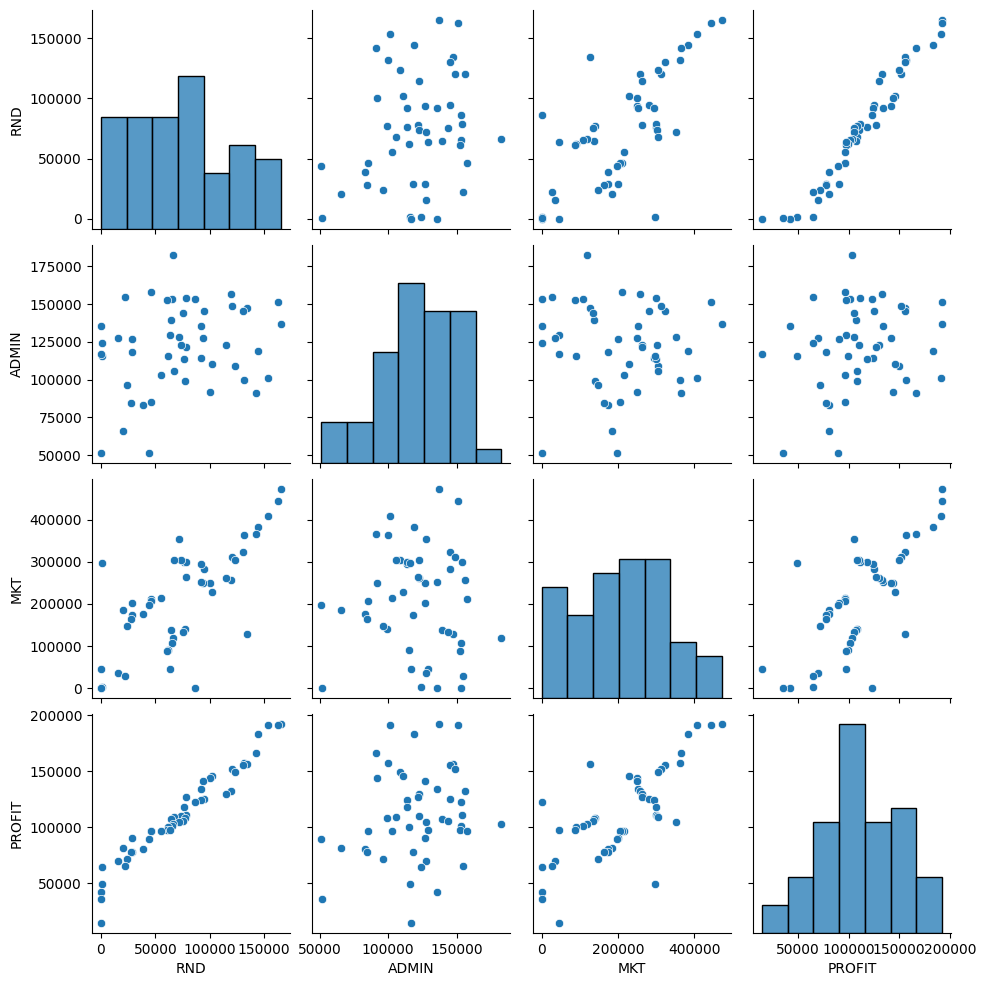

In [3]:
import seaborn as sns

sns.pairplot(df)


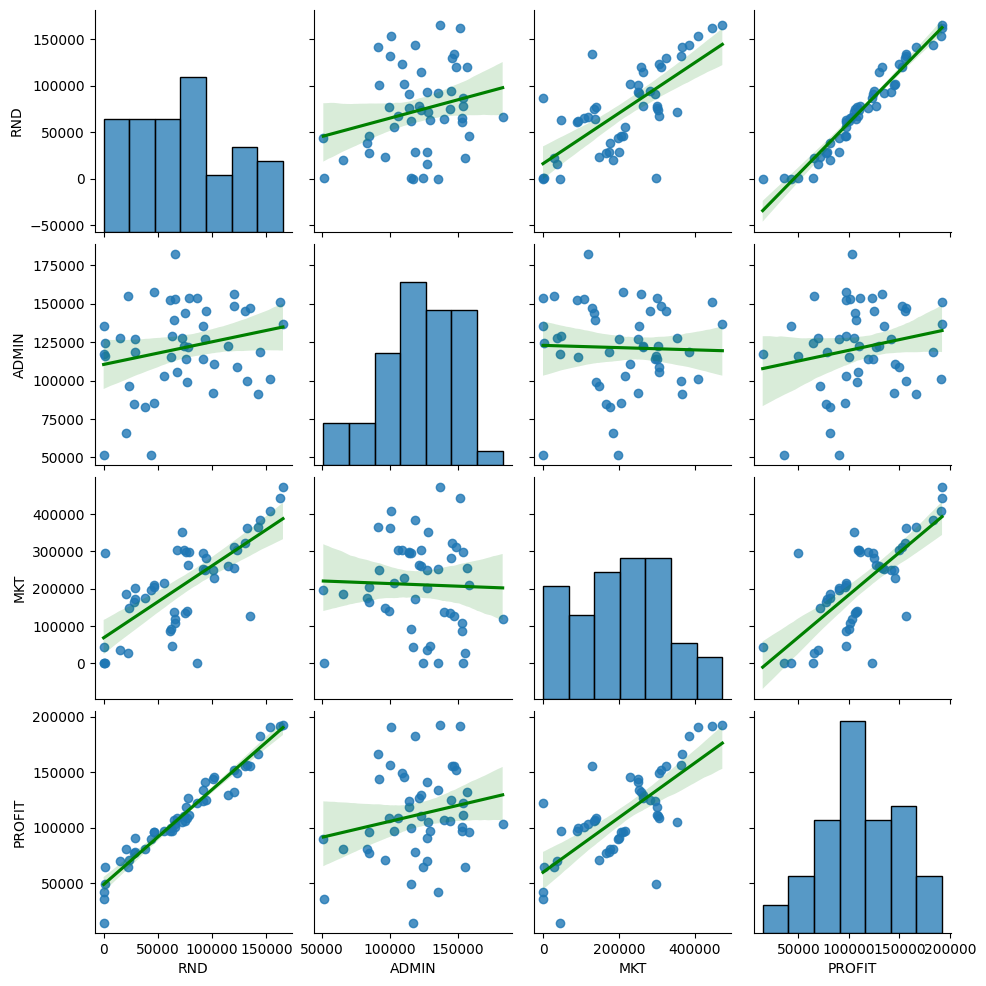

In [4]:
sns.pairplot(df, kind="reg", plot_kws={"line_kws":{"color":"green"}})

<Axes: xlabel='RND', ylabel='PROFIT'>

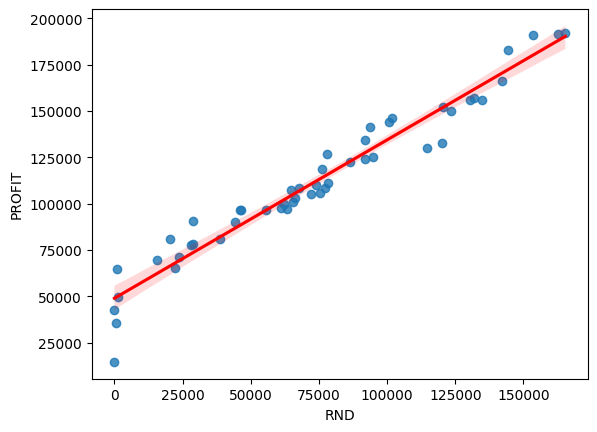

In [5]:
sns.regplot(data=df, x="RND", y="PROFIT", line_kws={"color":"red"})

In [6]:
df.corr(numeric_only=True)

,RND,ADMIN,MKT,PROFIT
RND,1.000000,0.241955,0.724248,0.972900
ADMIN,0.241955,1.000000,-0.032154,0.200717
MKT,0.724248,-0.032154,1.000000,0.747766
PROFIT,0.972900,0.200717,0.747766,1.000000


basic data quality check

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RND     50 non-null     float64
 1   ADMIN   50 non-null     float64
 2   MKT     50 non-null     float64
 3   STATE   50 non-null     object 
 4   PROFIT  50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [8]:
df.isna().sum()

RND       0
ADMIN     0
MKT       0
STATE     0
PROFIT    0
dtype: int64

In [9]:
df.duplicated().sum()

np.int64(0)

Seperate X and y

In [10]:
x=df[["RND"]]
y=df[["PROFIT"]]

In [11]:
x.head()

,RND
0,165349.20
1,162597.70
2,153441.51
3,144372.41
4,142107.34


In [12]:
y.head()

,PROFIT
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


LR model 

In [13]:
from sklearn.linear_model import LinearRegression

model= LinearRegression()

model.fit(x,y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [14]:
model.intercept_

array([49032.89914125])

In [15]:
model.coef_

array([[0.85429137]])

In [16]:
#predictions
ypred= model.predict(x)
ypred[0:5]

array([[190289.29389289],
       [187938.71118575],
       [180116.65707807],
       [172369.00320589],
       [170433.97345032]])

In [17]:
y.head()

,PROFIT
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


Evaluating the model

In [18]:
from sklearn.metrics import(
    root_mean_squared_error,
    mean_absolute_error,
    mean_absolute_percentage_error,
    r2_score,
)


def eval(model,x,y):
    ypred = model.predict(x)
    #metrics
    rmse = root_mean_squared_error(y,ypred)
    mae = mean_absolute_error(y,ypred)
    mape = mean_absolute_percentage_error(y,ypred)
    r2 = r2_score(y,ypred)
    
    print(f"RMSE = {rmse:.2f}")
    print(f"MAE  = {mae:.2f}")
    print(f"MAPE = {mape:.2%}")   
    print(f"R²   = {r2:.2%}")
    
eval(model,x,y)
    
    


RMSE = 9226.10
MAE  = 6910.98
MAPE = 11.07%
R²   = 94.65%


R2_SCORE(94.65) is greater than 80% so model is good

testing

In [19]:
rnd = 96_000
print("estimated profit = ",model.predict([[rnd]]))

estimated profit =  [[131044.87075138]]
